## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/statistikbanken/api
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables' pt 2: choose get request and json format and pt 3: execute:

  A. check the result
  
  B. in the code below this same get request is used to get information about all available data tables in 'databanken'. 

4. Change pt. 1 in the console to 'Retrieve data' pt 2: get request and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.

5. With data aggregation and data visualization answer the following questions:

  A. What is the change in pct of divorced danes from 2008 to 2020?

  B. Which of the 5 biggest cities has the highest percentage of 'Never Married'?

  C. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

  D. Show a bar chart of 'Married' and 'Never Married' for all ages in DK (Hint: 2 bars of different color)

In [52]:
# 5. A. What is the change in pct of divorced danes from 2008 to 2020?
import pandas as pd 
df_divorced = pd.read_csv("./divorced.csv",sep=";")
df_divorced
divorces_2008 = df_divorced.iloc[0,2]
divorces_2020 = df_divorced.iloc[1,2]
divorce_change_in_percent = (divorces_2020 - divorces_2008) / divorces_2008 * 100
print("change in pct of divorced: ", divorce_change_in_percent)

change in pct of divorced:  28.412503730786447


In [66]:
# B. Which of the 5 biggest cities has the highest percentage of 'Never Married'?
import pandas as pd 
df_never_married = pd.read_csv("./never_married.csv",sep=";")
df_minus_aggregated_data = df_never_married[(df_never_married['OMRÅDE'] != 'Hele landet') & (df_never_married['OMRÅDE'] != 'Region Hovedstaden') & (df_never_married['OMRÅDE'] != 'Region Midtjylland') & (df_never_married['OMRÅDE'] != 'Region Syddanmark') & (df_never_married['OMRÅDE'] != 'Region Sjælland') & (df_never_married['OMRÅDE'] != 'Region Nordjylland')]
df_minus_aggregated_data.sort_values('INDHOLD', ascending=False, inplace=True)
df_minus_aggregated_data[:5]

,CIVILSTAND,OMRÅDE,TID,INDHOLD
2,Ugift,København,2020K3,414218
84,Ugift,Aarhus,2020K3,208470
104,Ugift,Aalborg,2020K3,118694
58,Ugift,Odense,2020K3,112672
3,Ugift,Frederiksberg,2020K3,60802


(2100000.0, 2200000.0)

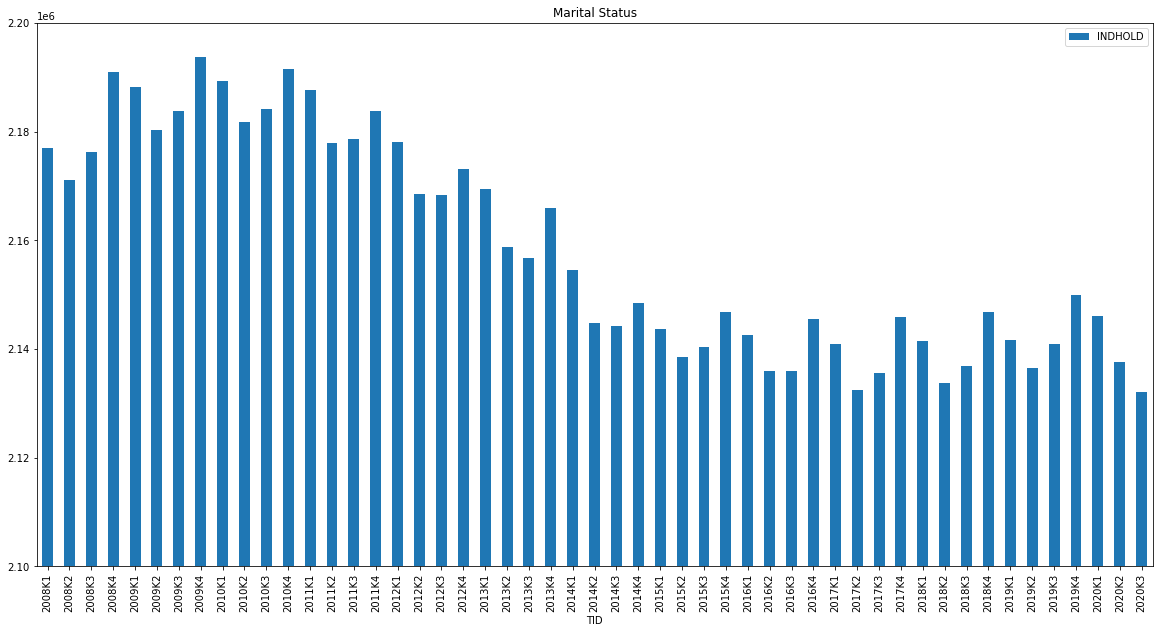

In [98]:
# C. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
df_marital_status = pd.read_csv("./marital_status.csv",sep=";")
df_marital_status
df_marital_status.plot(kind="bar", title='Marital Status', figsize=(20,10), x='TID', y='INDHOLD')
plt.ylim(2100000,2200000)

(0.0, 100.0)

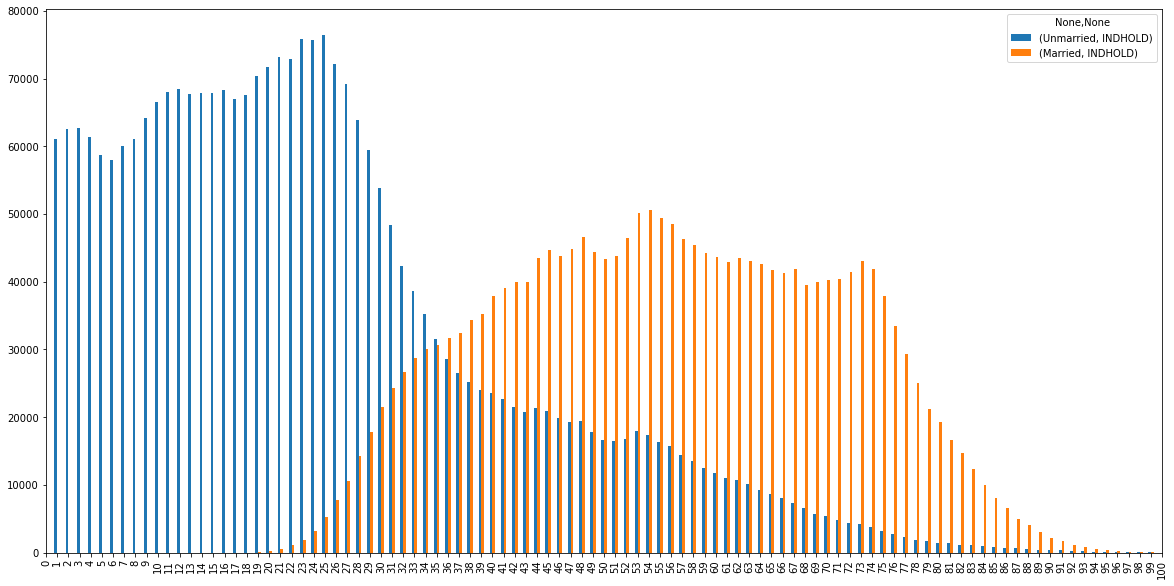

In [116]:
# D. Show a bar chart of 'Married' and 'Never Married' for all ages in DK (Hint: 2 bars of different color)
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
data = pd.read_csv("./married_never_married.csv",sep=";")
data = data[(data['ALDER'] != 'I alt')]
unmarried = data[(data['CIVILSTAND'] == 'Ugift')].reset_index(drop=True)
married = data[(data['CIVILSTAND'] == 'Gift/separeret')].reset_index(drop=True)
ts = pd.concat([unmarried, married], axis=1, keys=['Unmarried','Married'])
ts.plot(kind="bar", figsize=(20,10))
plt.xlim(0,100)